# Análisis de datos
# Tarea 4
## Ana Isabel Moreno Hernández
### NUA: 434232

## **Estadística y probabilidad I**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### **Gaussiana**

Utilizamos scipy para graficar la gaussiana, aunque también puede hacerse la distribución normal con una ecuación.

En la siguiente gráfica se mostrarán algunas distribuciones gaussianas, con medias y desviaciones estándar diferentes. 

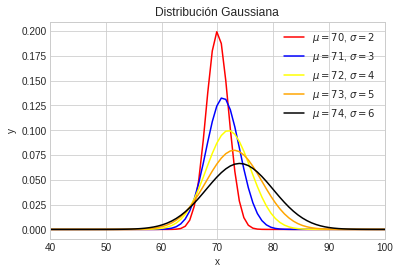

In [2]:
x_min = 40
x_max = 120

mean = 70
std = 2.0

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$\mu = 70$, $\sigma = 2$', '$\mu = 71$, $\sigma = 3$', '$\mu = 72$, $\sigma = 4$',
          '$\mu = 73$, $\sigma = 5$', '$\mu = 74$, $\sigma = 6$']
for i in range(5):
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean+i,std+i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(40,100)
plt.title('Distribución Gaussiana')
plt.grid(True)

Y para graficar la distribución acumulada también hacemos uso de scipy. En códigos siguientes se mostrará cómo graficarlas sin utilizar scipy.

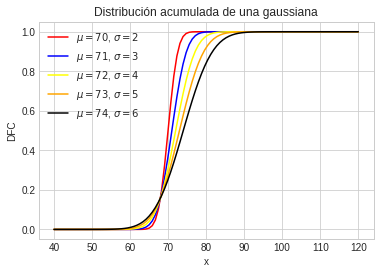

In [3]:
for i in range(5):
    x = np.linspace(x_min, x_max, 100)
    y_ac = scipy.stats.norm.cdf(x,mean+i,std+i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución acumulada de una gaussiana')
plt.grid(True)

En este caso, se analizará la distribución gaussiana con media igual a 70 y desviación estándar igual a 2.

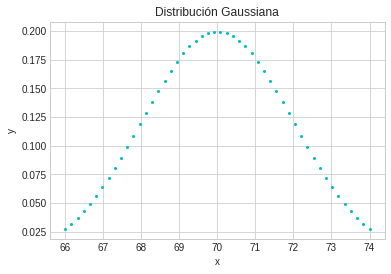

In [4]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

Y la distribución acumulada correspondiente es:

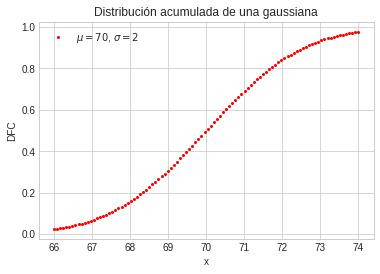

In [5]:
x_min = 66
x_max = 74

x = np.linspace(x_min, x_max, 100)
y_ac = scipy.stats.norm.cdf(x,mean,std)
plt.plot(x,y_ac,'o', color = color[0], markersize = 2, label = labels[0])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución acumulada de una gaussiana')
plt.grid(True)

Ahora graficamos x contra la frecuencia acumulada. 

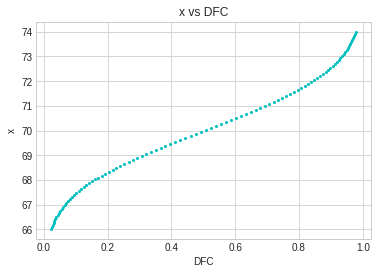

In [6]:
plt.plot(y_ac,x,'oc', markersize = 2)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos para encontrar valores de x distintos a los de la primer gráfica utilizando interpolate.interp1d de scipy. En la gráfica se muestra los puntos que resultaron de interpolar y se observa claramente que son distintos a los de la gráfica anterior. 

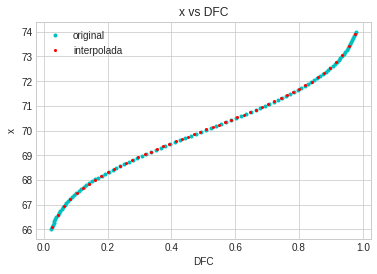

In [7]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 2, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y si hacemos un histograma con los valores nuevos de x, debemos obtener una distribución gaussiana otra vez.

Text(0, 0.5, 'Frecuencia')

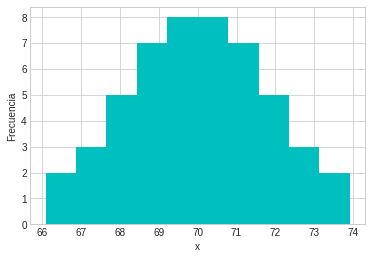

In [8]:
plt.hist(x_new, color = 'c');
plt.xlabel('x')
plt.ylabel('Frecuencia')

Utilizando seaborn, el histograma luce así:

Text(0, 0.5, 'y')

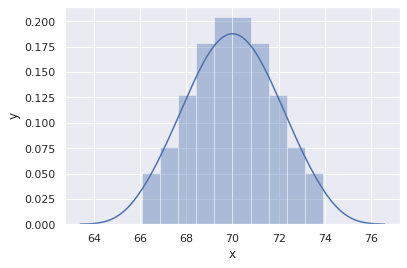

In [9]:
import seaborn as sns
sns.set()

sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

Ahora, si en lugar de obtener la distribución gaussiana con scipy la obtenemos utilizando la función de probabilidades, tenemos lo siguiente:

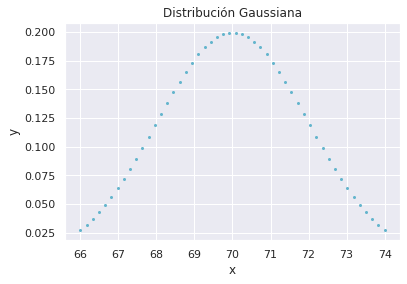

In [10]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = (1/(std*(2*np.pi)**0.5))*np.exp(-(x-mean)**2/(2*std**2))

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

Y para obtener la distribución acumulada basta con hacer el siguiente ciclo:

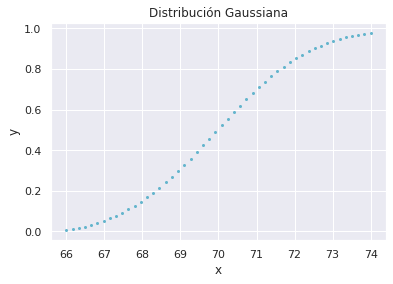

In [11]:
y_ac = np.zeros(50)

y_ac[0] = y[0]
for i in range(49):
    y_ac[i+1] = y_ac[i] + y[i+1]
 
y_ac = y_ac/6
plt.plot(x,y_ac,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

### **Distribución de Poisson**

Graficamos diferentes distribuciones de Poisson, tomando en cuenta que los valores de x deben ser enteros:]

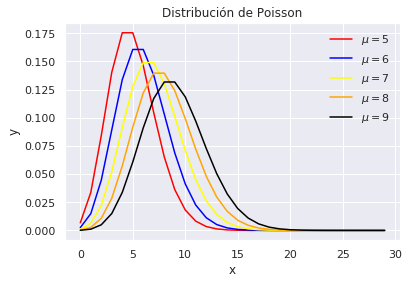

In [12]:
x_min = 0
x_max = 29

mu = 5

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$\mu = 5$', '$\mu = 6$', '$\mu = 7$',
          '$\mu = 8$', '$\mu = 9$']
for i in range(5):
    x = np.linspace(x_min, x_max, 30)
    y = scipy.stats.poisson.pmf(x,mu + i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución de Poisson')
plt.grid(True)

Y la distribución acumulada correspondiente es:

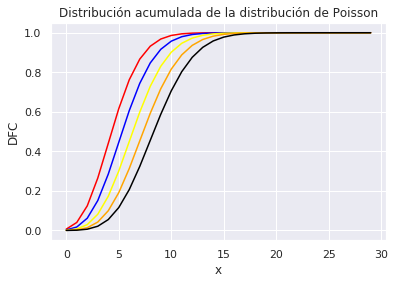

In [13]:
for i in range(5):
    x = np.linspace(x_min, x_max, 30)
    y_ac = scipy.stats.poisson.cdf(x,mu + i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución de Poisson')
plt.grid(True)

En este caso, analizaremos la distribución de poisson con $\mu = 5$:

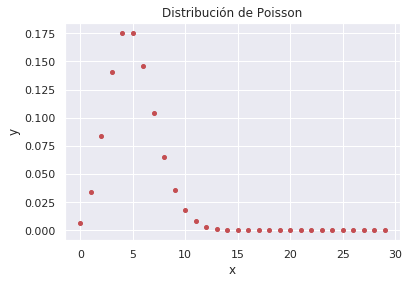

In [14]:
x_min = 0
x_max = 29

mu = 5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.poisson.pmf(x, mu)

plt.plot(x,y,'or', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de Poisson')
plt.grid(True)

Y ahora graficamos la distribución acumulada:

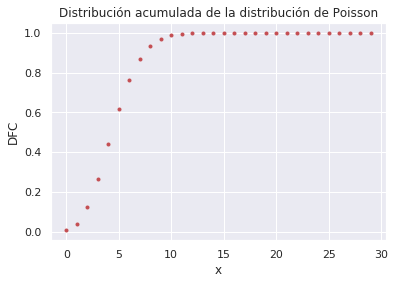

In [15]:
y_ac = scipy.stats.poisson.cdf(x, mu)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución de Poisson')
plt.grid(True)

Y x contra la frecuencia acumulada se ve como:

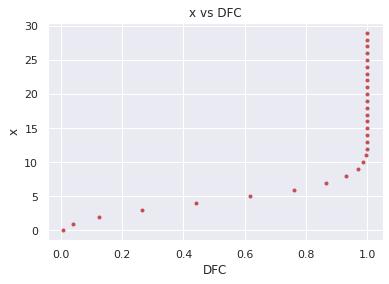

In [16]:
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos como lo hicimos con la distribución gaussiana y graficamos los puntos interpolados y los puntos originales en la misma gráfica.

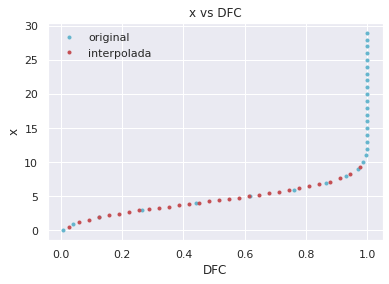

In [17]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los puntos obtenidos en la interpolación, la gráfica que se obtiene tiene una distribución de Poisson.

Text(0, 0.5, 'y')

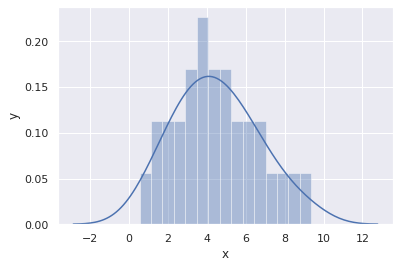

In [18]:
sns.distplot(x_new, bins = 15)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución beta**

Graficamos algunas distribuciones Beta, utilizando scipy:

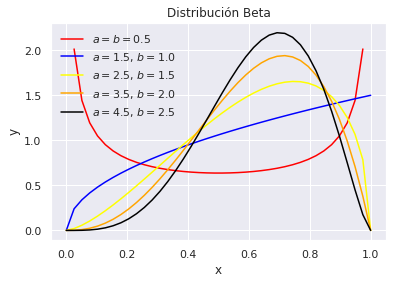

In [19]:
x_min = 0
x_max = 1

a = 0.5
b = 0.5

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$a = b = 0.5$', '$a = 1.5$, $b = 1.0$', '$a = 2.5$, $b = 1.5$',
          '$a = 3.5$, $b = 2.0$', '$a = 4.5$, $b = 2.5$']
for i in range(5):
    x = np.linspace(x_min, x_max, 40)
    y = scipy.stats.beta.pdf(x,a+i,b*i+0.5)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución Beta')
plt.grid(True)

Y las correspondientes distribuciones acumuladas son:

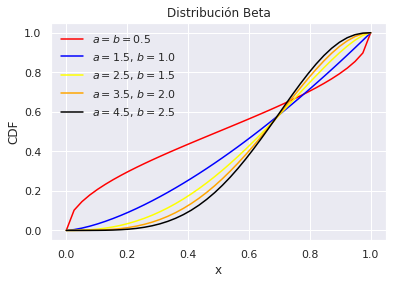

In [20]:
for i in range(5):
    x = np.linspace(x_min, x_max, 40)
    y = scipy.stats.beta.cdf(x,a+i,b*i+0.5)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.title('Distribución Beta')
plt.grid(True)

Nos limitaremos a analizar la distribución beta con $a = b = 0.5$.

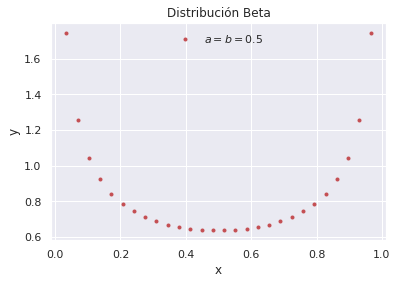

In [21]:
x_min = 0
x_max = 1

a = 0.5
b = 0.5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.beta.pdf(x, a, b)

plt.plot(x,y,'or', markersize = 3, label = '$a = b = 0.5$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Beta')
plt.grid(True)

Y la acumulada correspondiente se vería de la siguiente forma:

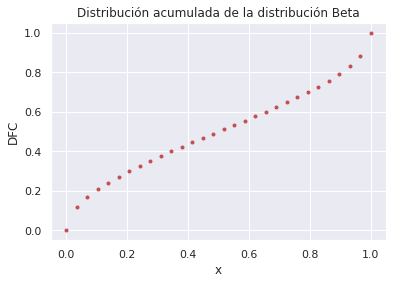

In [22]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Graficamos x contra DFC:

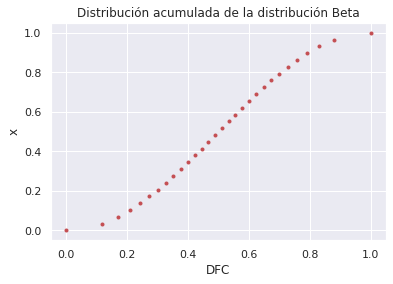

In [23]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Interpolamos para obtener nuevos valores en x:

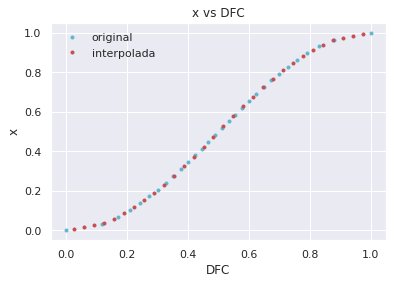

In [24]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los nuevos valores de x (obtenidos en la interpolación), deberíamos obtener la misma tribución beta:

Text(0, 0.5, 'y')

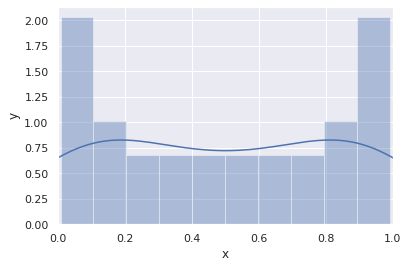

In [25]:
sns.distplot(x_new, bins = 10)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución binomial**

Nuevamente, graficamos varias distribuciones binomiales utilizando sicpy (en binomial x debe ser entero):

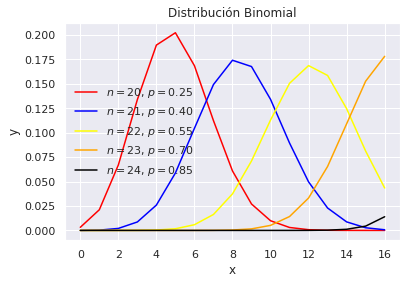

In [26]:
x_min = 0
x_max = 16

n = 20
p = 0.25

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$n = 20$, $p = 0.25$', '$n = 21$, $p = 0.40$', '$n = 22$, $p = 0.55$',
         '$n = 23$, $p = 0.70$', '$n = 24$, $p = 0.85$']
for i in range(5):
    x = np.linspace(x_min, x_max, 17)
    y = scipy.stats.binom.pmf(x,n+i,p+0.15*i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución Binomial')
plt.grid(True)

Y las correspondientes distribuciones acumuladas son:

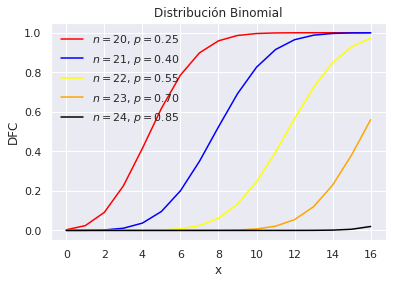

In [27]:
for i in range(5):
    x = np.linspace(x_min, x_max, 17)
    y_ac = scipy.stats.binom.cdf(x,n+i,p+0.15*i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución Binomial')
plt.grid(True)

La distribución binomial que analizaremos será con $n = 20$ y $p = 0.25$.

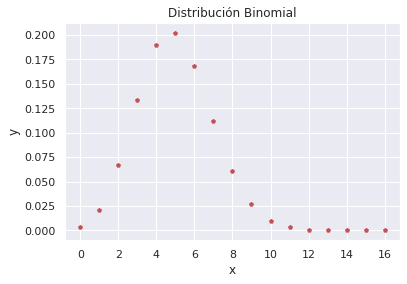

In [28]:
x_min = 0
x_max = 16

n = 20
p = 0.25

x = np.linspace(x_min, x_max, 17)
y = scipy.stats.binom.pmf(x, n, p)

plt.plot(x,y,'pr', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Binomial')
plt.grid(True)

Y la distribución acumulada es:

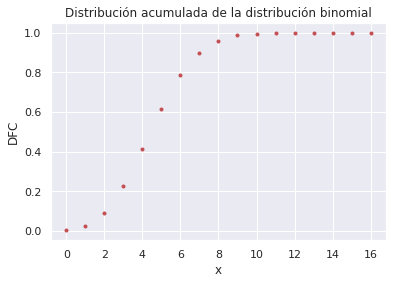

In [29]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Graficamos x contra CDF:

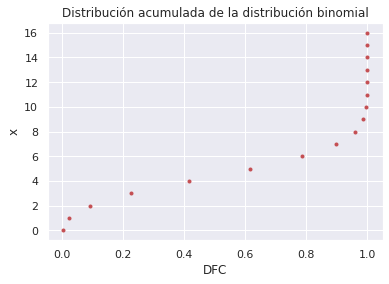

In [30]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Interpolamos para obtener nuevos valores de x:

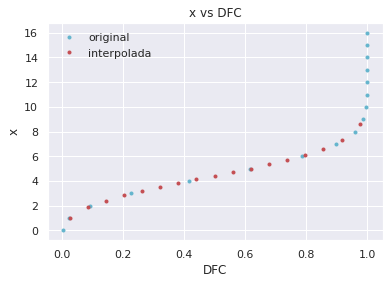

In [31]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,17)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma deberíamos de obtener una distribución binomial, muy parecida a la del inicio:

Text(0, 0.5, 'y')

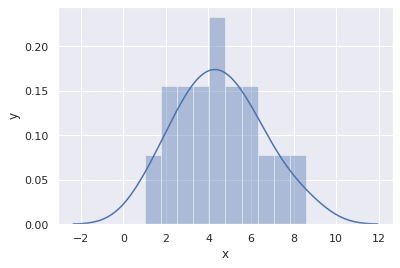

In [32]:
sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución $\chi ^2$**

Utilizamos scipy para obtener la distribución de probabilidad $\chi ^2$ con valores diferentes para $k$:

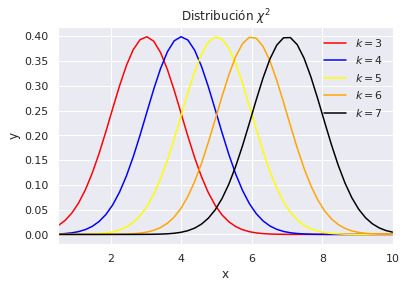

In [33]:
x_min = 0.5
x_max = 10

k = 3

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$k = 3$', '$k = 4$', '$k = 5$', '$k = 6$', '$k = 7$']
for i in range(5):
    x = np.linspace(x_min, x_max, 50)
    y = scipy.stats.norm.pdf(x,k+i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0.5,10)
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Y la distribución acumulada correspondiente es:

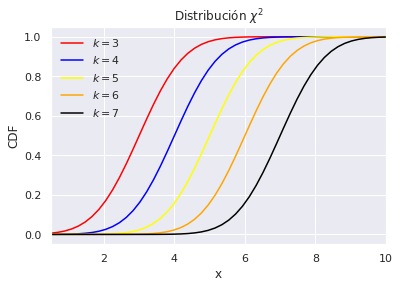

In [34]:
for i in range(5):
    x = np.linspace(x_min, x_max, 50)
    y_ac = scipy.stats.norm.cdf(x,k+i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.xlim(0.5,10)
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Nos limitaremos a analizar la distribución $\chi ^2$ con $k = 3$.

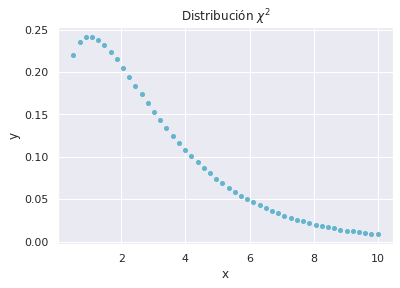

In [35]:
x_min = 0.5
x_max = 10

k = 3

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.chi2.pdf(x,k)

plt.plot(x,y,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos la distribución acumulada:

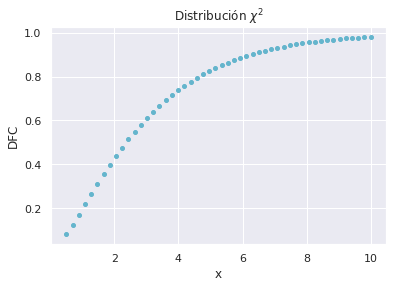

In [36]:
y_ac = scipy.stats.chi2.cdf(x,k)

plt.plot(x,y_ac,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos x contra la distribución acumulada:

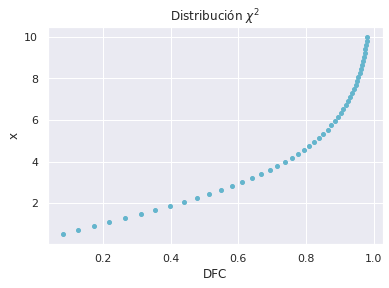

In [37]:
plt.plot(y_ac,x,'oc', markersize = 4)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Interpolamos:

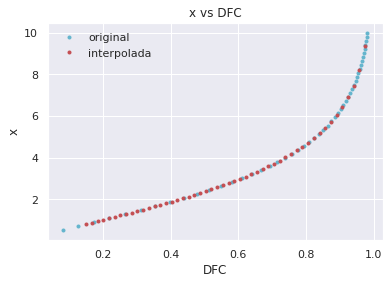

In [38]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.15,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de x_new, regresamos a la distribución $\chi ^2$

Text(0, 0.5, 'y')

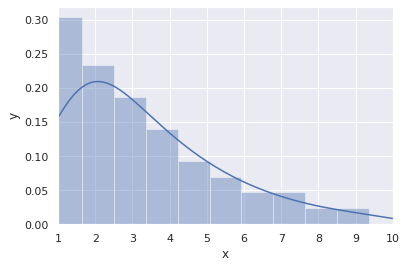

In [39]:
sns.distplot(x_new, bins = 10)
plt.xlim(1,10)
plt.xlabel('x')
plt.ylabel('y')

### **Transformation of variables**

Generamos ditribuciones uniformes para $r$ y $\theta$:

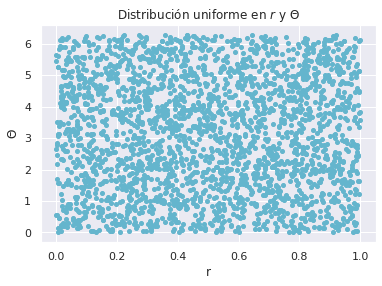

In [40]:
r = np.random.uniform(0,1,2500)
theta = np.random.uniform(0,2*np.pi,2500)

plt.plot(r,theta,'oc', markersize = 4)
plt.xlabel('r')
plt.ylabel('$\Theta$')
plt.title('Distribución uniforme en $r$ y $\Theta$')
plt.grid(True)

Y definimos x y y como $x = rcos\theta$ y $y = rsin\theta$, luego los graficamos y obtenemos una distribución no uniforme para $x$ y $y$.

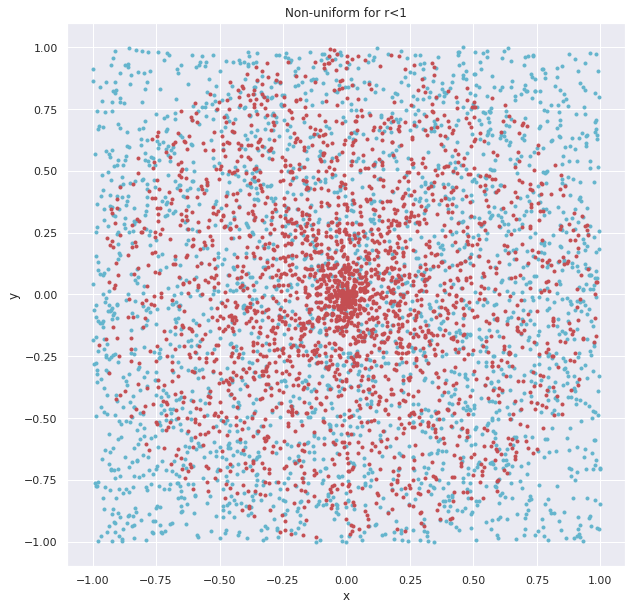

In [41]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x_n = r*np.cos(theta)
y_n = r*np.sin(theta)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_n,y_n,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-uniform for r<1')
plt.grid(True)

Y en esta última puede observarse la distribución no uniforme para x y y cuando se hace la transformación.  

Sin embargo, si hacemos una distribución uniforme en $x$ y $y$ y seleccionamos sólo aquellos puntos en donde $r = \sqrt(x^2 + y^2)$ y es menor que 1 y los graficamos, se verá un círculo de radio igual a 1 con distribución uniforme de puntos:

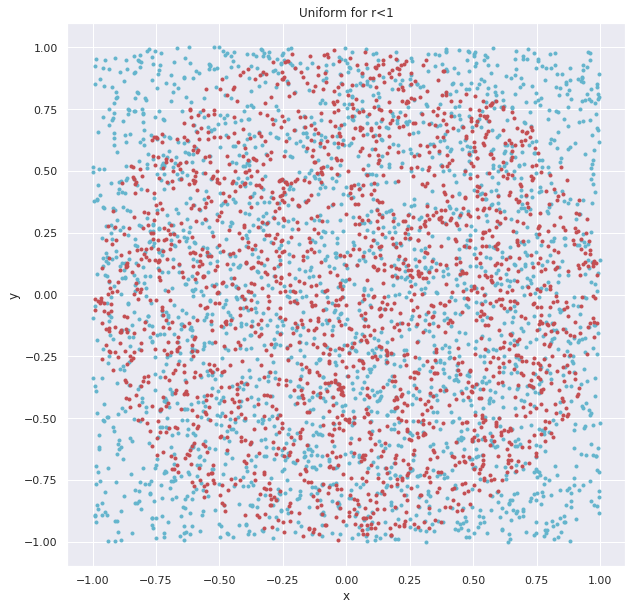

In [42]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x1 = np.random.uniform(-1,1,2500)
y1 = np.random.uniform(-1,1,2500)

raiz = np.sqrt(x1**2 + y1**2)
r1 = []
theta1 = []

for i in range(2500):
    if raiz[i] <= 1.00:
        r1.append(raiz[i])
        theta1.append(math.atan2(y1[i],x1[i]))

x_new = r1*np.cos(theta1)
y_new = r1*np.sin(theta1)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_new,y_new,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform for r<1')
plt.grid(True)

Para la gráfica 3D se hace algo similar. 
Primero generamos distribuciones uniformes para $r$, $\theta$ y $\phi$ y hacemos la transformación $x = rcos\theta sin\phi$, $y = rsen\theta sin\phi$ y $z = rcos\phi$:

In [43]:
plt.style.use('fivethirtyeight')
from mpl_toolkits import mplot3d

Text(0.5, 0.92, 'Non-uniform for r<1')

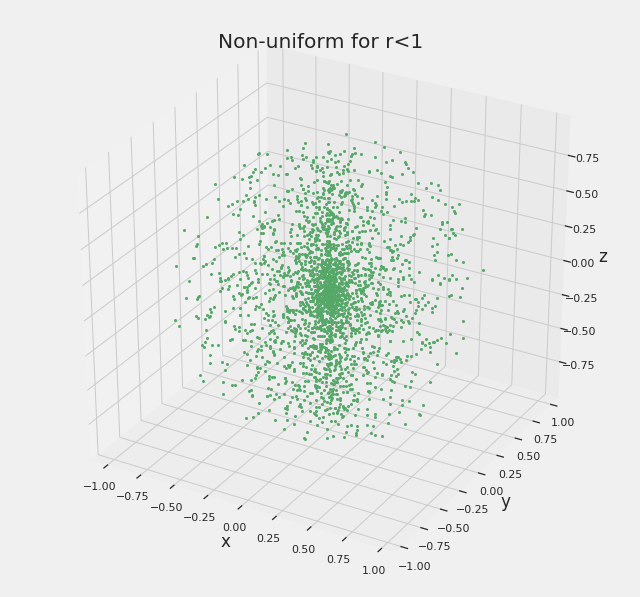

In [44]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d') # Creamos los ejes para la gráfica 3D

r = np.random.uniform(0,1,2500)
theta = np.random.uniform(0,np.pi,2500)
phi = np.random.uniform(0,2*np.pi,2500)

x_t = r*np.cos(phi)*np.sin(theta)
y_t = r*np.sin(phi)*np.sin(theta)
z_t = r*np.cos(theta)

ax.plot3D(x_t, y_t, z_t, 'og', markersize = 2); # Con plot el conjunto se une en una línea

# Data for three-dimensional scattered points
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Non-uniform for r<1')
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds'); # Con scatter3D se muestran puntos.

Ahora hacemos distribuciones uniformes en $x$, $y$ y $z$, y hacemos la transformación $r = \sqrt(x^2 + y^2 + z^2)$ para r menor a 1, $\phi = arctan(y/x)$ y $\theta = \sqrt(x^2+y^2)/z$.

Text(0.5, 0.92, 'Uniform for r<1')

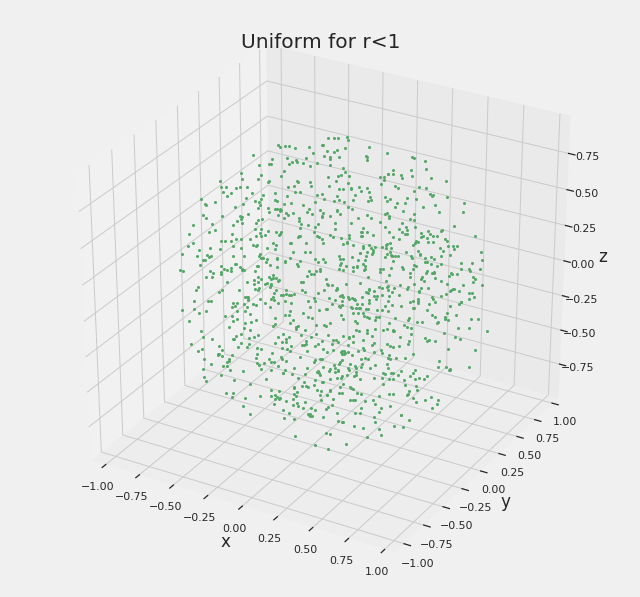

In [45]:
x = np.random.uniform(-1,1,2000)
y = np.random.uniform(-1,1,2000)
z = np.random.uniform(-1,1,2000)

raiz = np.sqrt(x**2 + y**2 + z**2)
r = []
theta = []
phi = []

for i in range(2000):
    if raiz[i] <= 1.00:
        r.append(raiz[i])
        phi.append(math.atan2(y[i],x[i]))
        theta.append(math.atan2(math.sqrt(x[i]**2+y[i]**2),z[i]))

x_new = r*np.cos(phi)*np.sin(theta)
y_new = r*np.sin(phi)*np.sin(theta)
z_new = r*np.cos(theta)

plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d') # Creamos los ejes para la gráfica 3D

ax.plot3D(x_new, y_new, z_new, 'og', markersize = 2); # Con plot el conjunto se une en una línea

# Data for three-dimensional scattered points
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Uniform for r<1')
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds'); # Con scatter3D se muestran puntos.

Exercise: 

If $y = \Phi (x) = exp(x)$ and $p(x) = 1$ for $0 \leq x \leq 1$ (a uniform distribution), what is the resultant distribution for $y$?

Solution. 

First of all, $\Phi ^{-1}(y) = \ln(y)$ for $1 \leq y \leq e$ (because when $x = 0$, $y = 1$; and when $x = 1$, $y = e$).

Also, $\frac{d\Phi ^{-1}(y)}{dy} = \frac{1}{y}$.

Thus, the resultant distribution for $y$ is $p(y) = 1(\frac{1}{y}) = \frac{1}{y}$ for $1 \leq y \leq e$, and as you can see, $\int_1^e\frac{1}{y}dy = 1$.

Primero graficamos la distribución de probabilidad de $x$.

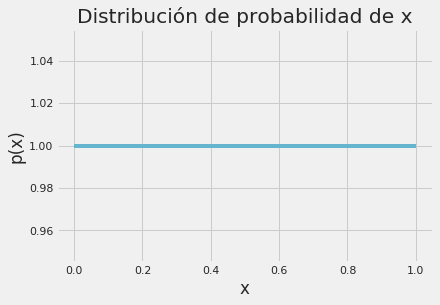

In [46]:
x = np.linspace(0,1,100)
px = np.ones(100)

plt.plot(x,px,'-c', markersize = 2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Distribución de probabilidad de x')
plt.grid(True)

Mientras que la distribución de probabilidad de $y$ es:

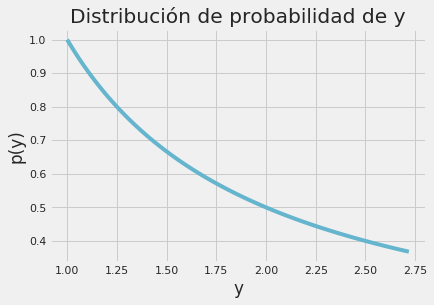

In [47]:
y = np.linspace(1,math.exp(1),100)
py = 1/y

plt.plot(y,py,'-c', markersize = 2)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.title('Distribución de probabilidad de y')
plt.grid(True)

## **Análisis de datos de temperaturas en México y salarios**

### **Salarios en Guanajuato**

In [48]:
tabulador = pd.read_excel('tabulador_pe2019.xls', header = 9)

In [49]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


- ¿Cuál es el promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [50]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].mean()

56245.526717310335

In [51]:
tabulador.describe()['SUELDO MENSUAL NETO'].mean()

39499.1310069769

- ¿Media y Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución.

In [52]:
tabulador['SUELDO MENSUAL NETO'].mean()

35829.35357437968

In [53]:
tabulador['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [54]:
tabulador['SUELDO MENSUAL BRUTO'].mean()


49467.3759351061

In [55]:
tabulador['SUELDO MENSUAL BRUTO'].mode()

0     9783.850296
1    11440.563407
dtype: float64

In [56]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%':'75%']

25%    12353.567028
50%    28148.204516
75%    70240.817524
Name: SUELDO MENSUAL BRUTO, dtype: float64

In [57]:
tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%':'75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

- ¿Cuál es la dispersión de sueldos? 

In [58]:
mediana = tabulador['SUELDO MENSUAL NETO'].median()
mediana

22078.22528193275

In [59]:
quarto = tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%']

In [60]:
trescuarto = tabulador.describe()['SUELDO MENSUAL NETO'].loc['75%']

In [61]:
maximo = tabulador['SUELDO MENSUAL NETO'].max()

Hacemos un histograma con la división de sueldos de 0 a 25%, 25% a 50%, 50% a 75% y 75% a 100%, y observamos el rango de salario de cada 25% de la población.

Text(0, 0.5, 'Frecuencia')

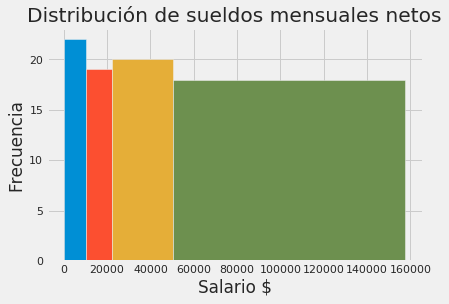

In [62]:
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[0, quarto]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[quarto+1, mediana]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[mediana+1, trescuarto]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[trescuarto+1, maximo]);

plt.title('Distribución de sueldos mensuales netos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')

In [63]:
quarto2 = tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%']

In [64]:
mediana2 = tabulador['SUELDO MENSUAL BRUTO'].median()
mediana2

28148.204515722646

In [65]:
trescuarto2 = tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['75%']

In [66]:
maximo2 = tabulador['SUELDO MENSUAL BRUTO'].max()

Lo mismo hacemos con sueldo mensual bruto.

Text(0, 0.5, 'Frecuencia')

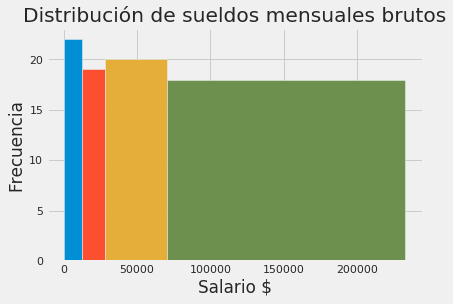

In [67]:
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[0, quarto2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[quarto2+1, mediana2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[mediana2+1, trescuarto2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[trescuarto2+1, maximo2]);

plt.title('Distribución de sueldos mensuales brutos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')

- ¿Cuál es el sueldo base máximo?

In [68]:
tabulador.describe()['SUELDO BASE'].max()

59804.3279302758

- ¿Cuál es el sueldo base mínimo?

In [69]:
tabulador.describe()['SUELDO MENSUAL NETO'].min()

79.0

- Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos.

In [70]:
tabulador = pd.read_excel('tabulador_pe2019.xls', header = 9)

In [71]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


Obtenemos el porcentaje relativo en cada columa:

In [72]:
tabulador['% SUELDO BASE'] = 1 - (tabulador['SUELDO MENSUAL NETO']-tabulador['SUELDO BASE'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% CUOTAS SEGURIDAD SOCIAL'] = 1- (tabulador['SUELDO MENSUAL NETO']-tabulador['CUOTAS SEGURIDAD SOCIAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% PREVISIÓN SOCIAL'] = 1- (tabulador['SUELDO MENSUAL NETO']-tabulador['PREVISIÓN SOCIAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% AYUDA X SERVICIOS'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['AYUDA X SERVICIOS'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% APOYO FAMILIAR'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['APOYO FAMILIAR'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% IMPTO MENSUAL'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['IMPTO MENSUAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% ISSEG'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['ISSEG'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% ISSSTE'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['ISSSTE'])/tabulador['SUELDO MENSUAL NETO']

Mostramos el porcentaje relativo de dinero de cada columna de cada puesto con respecto al sueldo mensual neto correspondiente.

In [73]:
tabulador.iloc[:,16:25]

,% SUELDO BASE,% CUOTAS SEGURIDAD SOCIAL,% PREVISIÓN SOCIAL,% AYUDA X SERVICIOS,% APOYO FAMILIAR,% IMPTO MENSUAL,% ISSEG,% ISSSTE
0,0.379231,0.037052,0.012131,0.164218,0.407706,0.441248,0.032230,0.004822
1,0.368785,0.043953,0.014391,0.171379,0.367528,0.427483,0.038233,0.005720
2,0.376605,0.054086,0.017708,0.174066,0.383193,0.407273,0.047047,0.007039
3,0.376605,0.054086,0.017708,0.174066,0.383193,0.407273,0.047047,0.007039
4,0.384889,0.060645,0.019856,0.173909,0.372855,0.394190,0.052753,0.007892
...,...,...,...,...,...,...,...,...
74,0.450074,0.087764,0.255176,0.060023,0.315420,0.085280,0.074262,0.013502
75,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687
76,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687
77,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687


- ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?

Hacemos una nueva columna en el data frame 'tabulador' en la cual se muestran la diferencia de sueldo de cada puesto con respecto al sueldo del gobernador.

In [74]:
tabulador['Diferencia'] = tabulador['SUELDO MENSUAL NETO'][0] - tabulador['SUELDO MENSUAL NETO']

In [75]:
tabulador[['PUESTO', 'SUELDO MENSUAL NETO', 'Diferencia']]

,PUESTO,SUELDO MENSUAL NETO,Diferencia
0,GOBERNADOR/A DEL ESTADO,157698.934369,0.000000
1,SECRETARIO/A DE ESTADO A,132939.199042,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,108033.486450,49665.447919
3,SECRETARIO/A DE ESTADO B,108033.486450,49665.447919
4,SECRETARIO/A DE ESTADO C,96349.090645,61349.843724
...,...,...,...
74,OPERADOR/A ADMINISTRATIVO/A C,7497.166508,150201.767861
75,OPERADOR/A ADMINISTRATIVO/A D,6751.946368,150946.988001
76,OPERADOR/A DE SERVICIOS D,6751.946368,150946.988001
77,OPERADOR/A COMERCIAL D,6751.946368,150946.988001


- ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? y  ¿Cuanto dinero es gastado en es ISSSTE entre todos los puestos?

Ya que anteriormente habíamos calculado el porcentaje de sueldo que se da en ISSSTE, IMPTO MENSUAL E ISSEG, sólo los mostramos con iloc.

In [76]:
tabulador.iloc[:,21:24]

,% IMPTO MENSUAL,% ISSEG,% ISSSTE
0,0.441248,0.032230,0.004822
1,0.427483,0.038233,0.005720
2,0.407273,0.047047,0.007039
3,0.407273,0.047047,0.007039
4,0.394190,0.052753,0.007892
...,...,...,...
74,0.085280,0.074262,0.013502
75,0.039083,0.075277,0.013687
76,0.039083,0.075277,0.013687
77,0.039083,0.075277,0.013687


Y la cantidad de dinero que se da al ISSSTE entre todos los puestos es:

In [77]:
tabulador['ISSSTE'].sum()

29411.26871446277

### **Temperaturas y precipitaciones**

In [180]:
# Datos de temperatura y precipitación
temp_minima_2019 = pd.read_csv('temp_minima_2019.csv', encoding='latin-1')
temp_media_2019 = pd.read_csv('temp_media_2019.csv', encoding='latin-1')
temp_maxima_2019 = pd.read_csv('temp_maxima_2019.csv', encoding='latin-1')
lluvias_2019 = pd.read_csv('lluvias_2019.csv', encoding='latin-1')

temp_minima_2018 = pd.read_csv('temp_minima_2018.csv',encoding='latin-1')
temp_media_2018 = pd.read_csv('temp_media_2018.csv',encoding='latin-1')
temp_maxima_2018 = pd.read_csv('temp_maxima_2018.csv',encoding='latin-1')
lluvias_2018 = pd.read_csv('lluvias_2018.csv',encoding='latin-1')

### - Distribución de temperaturas. 

- Promedio, desviaciones estándar, media, moda de la distribución. Rango interquartil de la distribución. 

In [181]:
anio = {1: 2018, 2: 2018, 3: 2018, 4: 2019, 5: 2019, 6: 2019}

In [182]:
temp = {1: 'Tmin', 2: 'Tmed', 3:'Tmax', 4: 'Tmin', 5: 'Tmed', 6:'Tmax'}

In [183]:
promedio = {1: temp_minima_2018['Tmin'].mean(), 2: temp_media_2018['Tmed'].mean(), 
           3: temp_maxima_2018['Tmax'].mean(), 4: temp_minima_2019['Tmin'].mean(),
           5: temp_media_2019['Tmed'].mean(), 6: temp_maxima_2019['Tmax'].mean()}

In [184]:
std = {1: temp_minima_2018['Tmin'].std(), 2: temp_media_2018['Tmed'].std(), 
           3: temp_maxima_2018['Tmax'].std(), 4: temp_minima_2019['Tmin'].std(),
           5: temp_media_2019['Tmed'].std(), 6: temp_maxima_2019['Tmax'].std()}

In [185]:
median = {1: temp_minima_2018['Tmin'].median(), 2: temp_media_2018['Tmed'].median(), 
           3: temp_maxima_2018['Tmax'].median(), 4: temp_minima_2019['Tmin'].median(),
           5: temp_media_2019['Tmed'].median(), 6: temp_maxima_2019['Tmax'].median()}

In [186]:
mode = {1: temp_minima_2018['Tmin'].mode(), 2: temp_media_2018['Tmed'].mode(), 
           3: temp_maxima_2018['Tmax'].mode(), 4: temp_minima_2019['Tmin'].mode(),
           5: temp_media_2019['Tmed'].mode(), 6: temp_maxima_2019['Tmax'].mode()}

In [187]:
percent25 = {1: temp_minima_2018.describe().loc['25%']['Tmin'], 2: temp_media_2018.describe().loc['25%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['25%']['Tmax'], 4: temp_minima_2019.describe().loc['25%']['Tmin'],
           5: temp_media_2019.describe().loc['25%']['Tmed'], 6: temp_maxima_2019.describe().loc['25%']['Tmax']}

In [188]:
percent50 = {1: temp_minima_2018.describe().loc['50%']['Tmin'], 2: temp_media_2018.describe().loc['50%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['50%']['Tmax'], 4: temp_minima_2019.describe().loc['50%']['Tmin'],
           5: temp_media_2019.describe().loc['50%']['Tmed'], 6: temp_maxima_2019.describe().loc['50%']['Tmax']}

In [189]:
percent75 = {1: temp_minima_2018.describe().loc['75%']['Tmin'], 2: temp_media_2018.describe().loc['75%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['75%']['Tmax'], 4: temp_minima_2019.describe().loc['75%']['Tmin'],
           5: temp_media_2019.describe().loc['75%']['Tmed'], 6: temp_maxima_2019.describe().loc['75%']['Tmax']}

Hacemos un dataFrame para representar mejor el promedio, la desviación estándar, la mediana, la moda de la distrbución y el rango interquartil de cada nivel de temperatura en cada año.

In [190]:
data = pd.DataFrame({'Año': anio,
                    'Nivel': temp,
                    'Promedio': promedio,
                    'std': std,
                    'Mediana': median,
                    'Moda': mode,
                    '25%': percent25,
                    '50%': percent50,
                    '75%': percent75})
data

,Año,Nivel,Promedio,std,Mediana,Moda,25%,50%,75%
1,2018,Tmin,8.372247,6.170696,7.500000,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,3.850000,7.500000,12.750000
2,2018,Tmed,16.379527,4.960928,15.800000,0 12.6 dtype: float64,12.550000,15.800000,20.600000
3,2018,Tmax,24.383076,4.606409,24.000000,0 24.1 dtype: float64,21.000000,24.000000,27.500000
4,2019,Tmin,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,5.350806,8.937345,15.128017
5,2019,Tmed,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,13.937570,16.516129,21.467742
6,2019,Tmax,24.992289,4.434152,24.657766,0 22.0 dtype: float64,21.838710,24.657766,27.931452


Y el promedio, la desviación estándar, la mediana, la moda y los rangos interquartiles en cada nivel de temperatura sin importar el año los calculamos con los siguientes comandos:

In [191]:
tempa = {1: 'Tmin', 2: 'Tmed', 3: 'Tmax'}

In [192]:
arreglo1 = temp_minima_2018['Tmin'].append(temp_minima_2019['Tmin'])
arreglo2 = temp_media_2018['Tmed'].append(temp_media_2019['Tmed'])
arreglo3 = temp_maxima_2018['Tmax'].append(temp_maxima_2019['Tmax'])

In [193]:
promedioa = {1: arreglo1.describe().loc['mean'],
            2: arreglo2.describe().loc['mean'], 
           3: arreglo3.describe().loc['mean']}

In [199]:
stda = {1: arreglo1.describe().loc['std'],
            2: arreglo2.describe().loc['std'], 
           3: arreglo3.describe().loc['std']}

In [204]:
medianaa = {1: arreglo1.median(),
            2: arreglo2.median(), 
           3: arreglo3.median()}

In [198]:
modaa = {1: arreglo1.mode(),
            2: arreglo2.mode(), 
           3: arreglo3.mode()}

In [201]:
percent25a = {1: arreglo1.describe().loc['25%'],
            2: arreglo2.describe().loc['25%'], 
           3: arreglo3.describe().loc['25%']}

In [202]:
percent50a = {1: arreglo1.describe().loc['50%'],
            2: arreglo2.describe().loc['50%'], 
           3: arreglo3.describe().loc['50%']}

In [203]:
percent75a = {1: arreglo1.describe().loc['75%'],
            2: arreglo2.describe().loc['75%'], 
           3: arreglo3.describe().loc['75%']}

Hacemos una dataFrame para representar mejor los datos.

In [207]:
data2 = pd.DataFrame({'Nivel': tempa,
                    'Promedio': promedioa,
                    'std': stda,
                    'Mediana': medianaa,
                    'Moda': modaa,
                    '25%': percent25a,
                    '50%': percent50a,
                    '75%': percent75a})
data2

,Nivel,Promedio,std,Mediana,Moda,25%,50%,75%
1,Tmin,8.912544,6.123740,8.000000,0 2.5 1 4.8 2 5.4 3 5.6 4 7.2 d...,4.3,8.000000,13.9
2,Tmed,16.769526,4.906068,16.068548,0 12.6 dtype: float64,13.0,16.068548,20.8
3,Tmax,24.624620,4.547447,24.200000,0 24.1 dtype: float64,21.4,24.200000,27.6


- Diferencia en el promedio de las temperaturas máxima, mínima y  media entre 2018 y 2019.

In [208]:
promedio2018 = {'Tmin': temp_minima_2018['Tmin'].mean(), 'Tmed': temp_media_2018['Tmed'].mean(), 
           'Tmax': temp_maxima_2018['Tmax'].mean()}
promedio2019 = { 'Tmin': temp_minima_2019['Tmin'].mean(),
           'Tmed': temp_media_2019['Tmed'].mean(),'Tmax': temp_maxima_2019['Tmax'].mean()}

In [211]:
data3 = pd.DataFrame({'Promedio 2018': promedio2018,
                    'Promedio 2019': promedio2019})
data3['Diferencia'] = data3['Promedio 2019']-data3['Promedio 2018']
data3

,Promedio 2018,Promedio 2019,Diferencia
Tmin,8.372247,9.812221,1.439973
Tmed,16.379527,17.444502,1.064975
Tmax,24.383076,24.992289,0.609213


### Precipitación